
**CHÀO MỪNG BẠN ĐẾN VỚI PHÂN TÍCH ĐIỂM SỐ BẰNG CÁC THUẬT TOÁN**
- Trong phần này mình sẽ phân tích về các phần liên quan đến điểm số từ đó đưa ra lời khuyên để chọn ngành.
- Trong phần này mình có sử dung 2 thuật toán chính: Thuật toán KNN và thuật toán KMeans.
<p>*(Nguồn dữ liệu: ĐH Kinh Tế TP.HCM)*<p>
---



# **Đầu tiên, chúng ta sẽ đọc file Nganh.csv**

---



In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
# Giả lập danh sách ngành với điểm chuẩn
df = pd.read_csv('Nganh.csv')

# **Sau đó, chúng ta sẽ tìm hệ số tương quan giữa Chỉ tiêu và Điểm thi tốt nghiệp**

---



In [11]:
correlation = df["Chi_tieu"].corr(df["Diem_thi_tot_nghiep"])
print(f"Hệ số tương quan: {correlation:.2f}")

Hệ số tương quan: 0.17


**Chúng ta sẽ tiếp tục tính xem có bao nhiêu ngành được tuyển sinh với chỉ tiêu thấp, trung bình và cao.**


In [12]:
def chi_tieu_group(ct):
    if ct < 100:
        return "Thấp"
    elif ct <= 300:
        return "Trung bình"
    else:
        return "Cao"

df["Nhom_chi_tieu"] = df["Chi_tieu"].apply(chi_tieu_group)

# Đếm số ngành (môn) thuộc mỗi nhóm chỉ tiêu
so_luong_nganh = df["Nhom_chi_tieu"].value_counts()

print("Số lượng ngành theo nhóm chỉ tiêu:")
print(so_luong_nganh)


Số lượng ngành theo nhóm chỉ tiêu:
Nhom_chi_tieu
Thấp          28
Trung bình    22
Cao            4
Name: count, dtype: int64


# **Vẽ bảng thể hiện mối quan hệ giữa chỉ tiêu và điểm chuẩn**

---



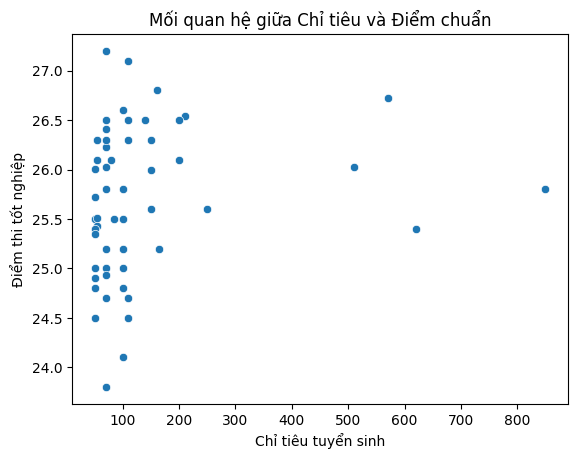

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df, x="Chi_tieu", y="Diem_thi_tot_nghiep")
plt.title("Mối quan hệ giữa Chỉ tiêu và Điểm chuẩn")
plt.xlabel("Chỉ tiêu tuyển sinh")
plt.ylabel("Điểm thi tốt nghiệp")
plt.show()


# **KNN**

---



In [14]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

X = df[["Chi_tieu", "Diem_thi_tot_nghiep"]]

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [15]:
# Sử dụng KNN (k-nearest neighbors không giám sát)
knn = NearestNeighbors(n_neighbors=5)
knn.fit(X_scaled)

# Ví dụ thí sinh có điểm 26.2 và chọn ngành có chỉ tiêu 100
new_student = scaler.transform([[100, 26.2]])
distances, indices = knn.kneighbors(new_student)

# Hiển thị các ngành gần nhất
closest_majors = df.iloc[indices[0]]
print("Top 5 ngành gần nhất (về điểm và chỉ tiêu):")
print(closest_majors)


Top 5 ngành gần nhất (về điểm và chỉ tiêu):
    STT          Ma  Chi_tieu              Ma_xet  Diem_thi_tot_nghiep  \
1     2     7310101       110  A00, A01, D01, D07                26.30   
53   54  7810201_02        80  A00, A01, D01, D07                26.10   
44   45  7480201_02        70  A00, A01, D01, D07                26.23   
48   49  7510605_02        70  A00, A01, D01, D07                26.30   
23   24  7340201_06        70  A00, A01, D01, D07                26.03   

   Nhom_chi_tieu  
1     Trung bình  
53          Thấp  
44          Thấp  
48          Thấp  
23          Thấp  


c:\Users\Việt Tùng\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


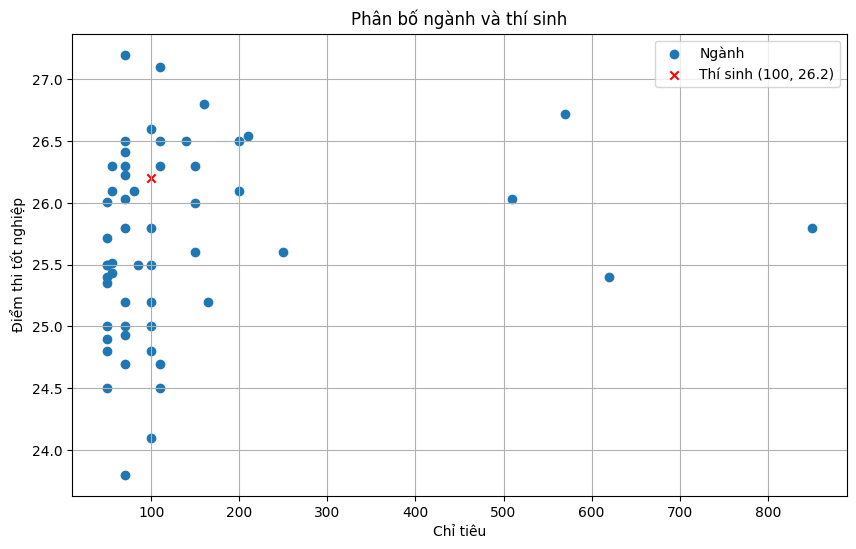

In [16]:
plt.figure(figsize=(10,6))
plt.scatter(df["Chi_tieu"], df["Diem_thi_tot_nghiep"], label='Ngành')
plt.scatter(100, 26.2, color='red', label='Thí sinh (100, 26.2)', marker='x')
plt.xlabel("Chỉ tiêu")
plt.ylabel("Điểm thi tốt nghiệp")
plt.legend()
plt.title("Phân bố ngành và thí sinh")
plt.grid(True)
plt.show()


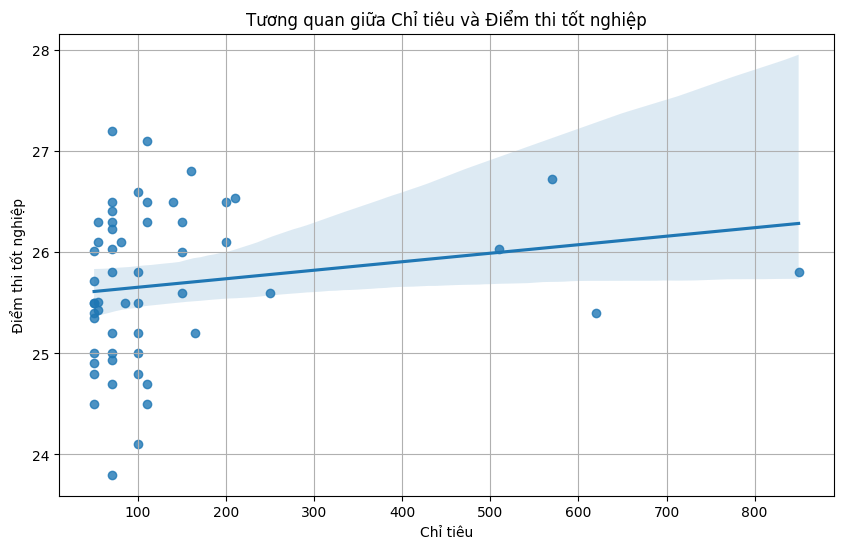

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Vẽ biểu đồ scatter
plt.figure(figsize=(10,6))
sns.regplot(data=df, x="Chi_tieu", y="Diem_thi_tot_nghiep")
plt.title("Tương quan giữa Chỉ tiêu và Điểm thi tốt nghiệp")
plt.xlabel("Chỉ tiêu")
plt.ylabel("Điểm thi tốt nghiệp")
plt.grid(True)
plt.show()


# **KMEANS**

---



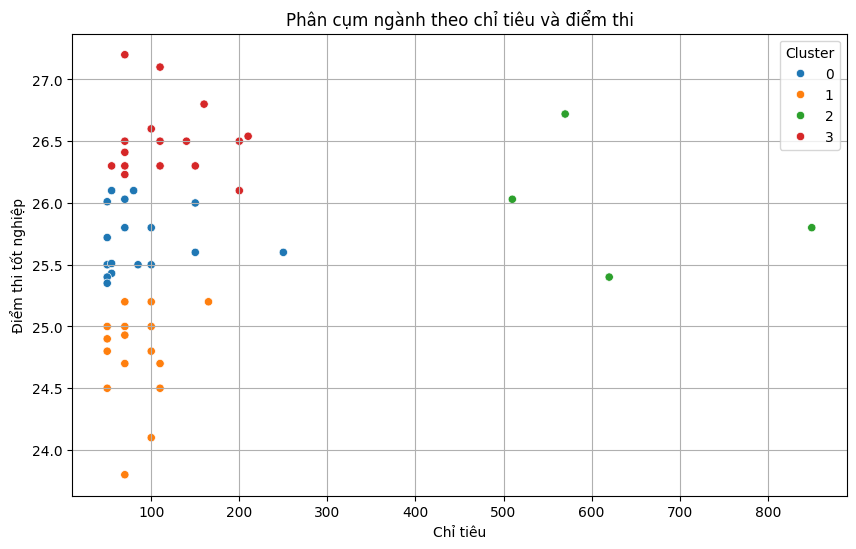

In [17]:
from sklearn.cluster import KMeans

# Gán cụm
kmeans = KMeans(n_clusters=4, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

# Vẽ biểu đồ
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="Chi_tieu", y="Diem_thi_tot_nghiep", hue="Cluster", palette="tab10")
plt.title("Phân cụm ngành theo chỉ tiêu và điểm thi")
plt.xlabel("Chỉ tiêu")
plt.ylabel("Điểm thi tốt nghiệp")
plt.grid(True)
plt.show()


# **Sau đó chúng mình đã phân tích xác suất để học sinh đó có thể vào được (Mức điểm 26.2)**

---



In [18]:
def admission_chance(score, cutoff):
    if score >= cutoff + 1:
        return "⭐ Cao"
    elif score >= cutoff:
        return "⚠️ Trung bình"
    else:
        return "❌ Thấp"

# Giả sử thí sinh 26.2 điểm
score = 26.2
df["Xac_suat"] = df["Diem_thi_tot_nghiep"].apply(lambda x: admission_chance(score, x))
print(df[["Ma", "Chi_tieu", "Diem_thi_tot_nghiep", "Xac_suat"]].head(10))


           Ma  Chi_tieu  Diem_thi_tot_nghiep       Xac_suat
0     7220201       150                26.30         ❌ Thấp
1     7310101       110                26.30         ❌ Thấp
2     7310102        50                24.90          ⭐ Cao
3  7310104_01       200                26.10  ⚠️ Trung bình
4  7310104_02       100                24.80          ⭐ Cao
5     7310107        50                26.01  ⚠️ Trung bình
6  7310108_01        50                25.72  ⚠️ Trung bình
7  7310108_02        70                25.00          ⭐ Cao
8     7320106       100                26.60         ❌ Thấp
9  7340101_01       850                25.80  ⚠️ Trung bình


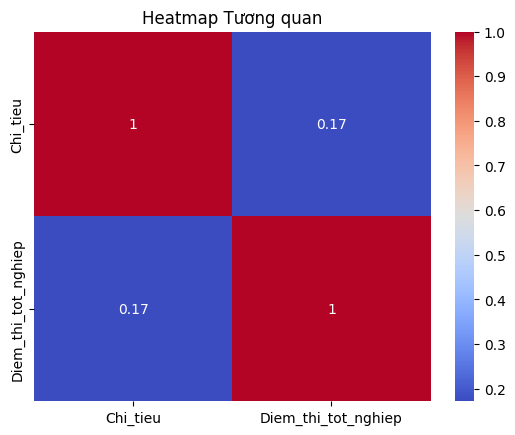

In [19]:
sns.heatmap(df[["Chi_tieu", "Diem_thi_tot_nghiep"]].corr(), annot=True, cmap="coolwarm")
plt.title("Heatmap Tương quan")
plt.show()

In [20]:
# Đếm số lần xuất hiện mỗi tổ hợp môn
tohop_counts = df['Ma_xet'].value_counts().reset_index()
tohop_counts.columns = ['Ma_xet','So_luong']
print(tohop_counts.head(10))


               Ma_xet  So_luong
0  A00, A01, D01, D07        49
1  A00, A01, D01, V00         2
2  A00, A01, D01, D96         2
3            D01, D96         1


In [21]:
avg_scores = df.groupby('Ma_xet')['Diem_thi_tot_nghiep'].mean().reset_index().sort_values(by='Diem_thi_tot_nghiep', ascending=False)
print(avg_scores.head(10))

               Ma_xet  Diem_thi_tot_nghiep
3            D01, D96            26.300000
1  A00, A01, D01, D96            25.700000
0  A00, A01, D01, D07            25.671633
2  A00, A01, D01, V00            25.650000


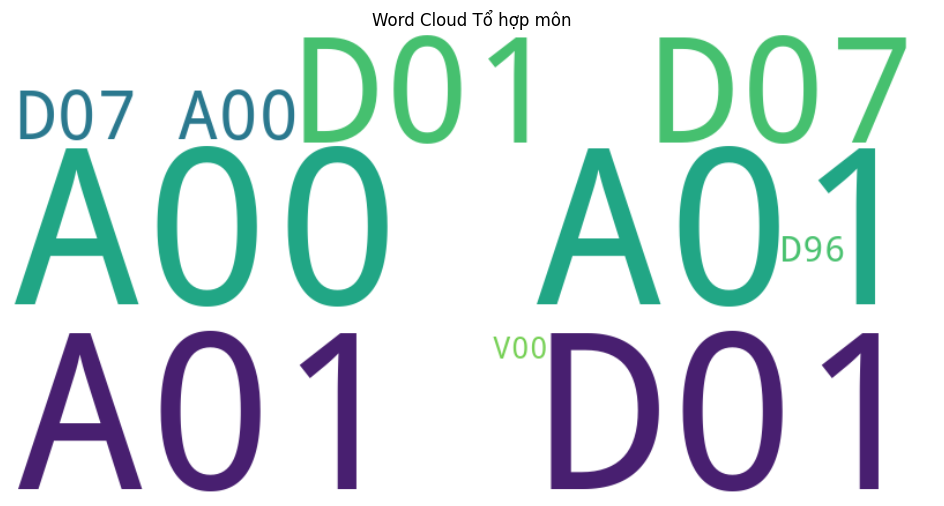

In [22]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(df['Ma_xet']))
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud Tổ hợp môn")
plt.show()

In [23]:
top_high = df[df['Diem_thi_tot_nghiep'] > 26]['Ma_xet'].value_counts().head()
top_low = df[df['Diem_thi_tot_nghiep'] < 20]['Ma_xet'].value_counts().head()

print("📈 Tổ hợp môn thường có điểm cao:")
print(top_high)

print("\n📉 Tổ hợp môn thường có điểm thấp:")
print(top_low)

📈 Tổ hợp môn thường có điểm cao:
Ma_xet
A00, A01, D01, D07    20
D01, D96               1
A00, A01, D01, V00     1
Name: count, dtype: int64

📉 Tổ hợp môn thường có điểm thấp:
Series([], Name: count, dtype: int64)


In [ ]:
import pandas as pd

# Assuming df is your DataFrame

# Split 'Ma_xet' into multiple subject combinations
df['to_hop_rieng'] = df['Ma_xet'].str.split(',')

# Flatten the 'to_hop_rieng' column so each subject combination gets its own row (explode)
df_exploded = df.explode('to_hop_rieng')

# Remove any leading or trailing spaces in 'to_hop_rieng'
df_exploded['to_hop_rieng'] = df_exploded['to_hop_rieng'].str.strip()

# Filter based on the subject combination 'A00' and 'Diem_thi_tot_nghiep' <= 26.2
df_recommend = df_exploded[(df_exploded['to_hop_rieng'] == 'A00') & (df_exploded['Diem_thi_tot_nghiep'] <= 26.2)]

# Sort the filtered results by 'Diem_thi_tot_nghiep' (optional)
df_recommend = df_recommend.sort_values(by='Diem_thi_tot_nghiep')

# Print the recommendation
print("📌 Gợi ý ngành phù hợp với tổ hợp A00 và điểm <= 26.2:")
print(df_recommend[['Ma', 'to_hop_rieng', 'Diem_thi_tot_nghiep', 'Chi_tieu']])


📌 Gợi ý ngành phù hợp với tổ hợp A00 và điểm <= 26.2:
            Ma to_hop_rieng  Diem_thi_tot_nghiep  Chi_tieu
42  7480107_02          A00                23.80        70
11  7340101_03          A00                24.10       100
25     7340204          A00                24.50        50
14     7340116          A00                24.50       110
41  7480107_01          A00                24.70        70
49     7580104          A00                24.70       110
46     7480202          A00                24.80        50
4   7310104_02          A00                24.80       100
2      7310102          A00                24.90        50
32     7340403          A00                24.93        70
21  7340201_04          A00                25.00       100
7   7310108_02          A00                25.00        70
39     7480101          A00                25.00        50
51     7810103          A00                25.20       165
19  7340201_02          A00                25.20       100
28

In [24]:
import pandas as pd

# Assuming df is your DataFrame with the data you provided

# Filter based on the 'To_hop_mon' column and sort by 'Diem_thi_tot_nghiep'
df_recommend = df[df['Ma_xet'].isin(['A00', 'B00'])].sort_values(by='Diem_thi_tot_nghiep')

# Print the recommendation for the top 10 rows
print("📌 Gợi ý ngành phù hợp tổ hợp A00 hoặc B00:")
print(df_recommend[['Ma', 'Ma_xet', 'Diem_thi_tot_nghiep', 'Chi_tieu']].head(10))

# Process the 'To_hop_mon' column by splitting the values by commas
tohop_rieng = df['Ma_xet'].str.split(',', expand=False)

# Create a copy of the dataframe for modification
df_exploded = df.copy()

# Assign the exploded 'To_hop_mon' column back to the dataframe
df_exploded['Ma_xet'] = tohop_rieng

# Explode the 'To_hop_mon' column to create multiple rows
df_exploded = df_exploded.explode('Ma_xet')

# Remove any extra whitespace from the 'To_hop_mon' values
df_exploded['Ma_xet'] = df_exploded['Ma_xet'].str.strip()

# Now df_exploded contains the data with each subject combination in a separate row
print("\n📌 Dữ liệu sau khi tách các tổ hợp môn:")
print(df_exploded[['Ma', 'Ma_xet', 'Diem_thi_tot_nghiep', 'Chi_tieu']].head(10))


📌 Gợi ý ngành phù hợp tổ hợp A00 hoặc B00:
Empty DataFrame
Columns: [Ma, Ma_xet, Diem_thi_tot_nghiep, Chi_tieu]
Index: []

📌 Dữ liệu sau khi tách các tổ hợp môn:
        Ma Ma_xet  Diem_thi_tot_nghiep  Chi_tieu
0  7220201    D01                 26.3       150
0  7220201    D96                 26.3       150
1  7310101    A00                 26.3       110
1  7310101    A01                 26.3       110
1  7310101    D01                 26.3       110
1  7310101    D07                 26.3       110
2  7310102    A00                 24.9        50
2  7310102    A01                 24.9        50
2  7310102    D01                 24.9        50
2  7310102    D07                 24.9        50


In [25]:
tohop_counts = df_exploded['Ma_xet'].value_counts().reset_index()
tohop_counts.columns = ['Ma_xet', 'So_luong']

C:\Users\Việt Tùng\AppData\Local\Temp\ipykernel_20744\1190204117.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tohop_counts.head(5), x='Ma_xet', y='So_luong', palette='magma')


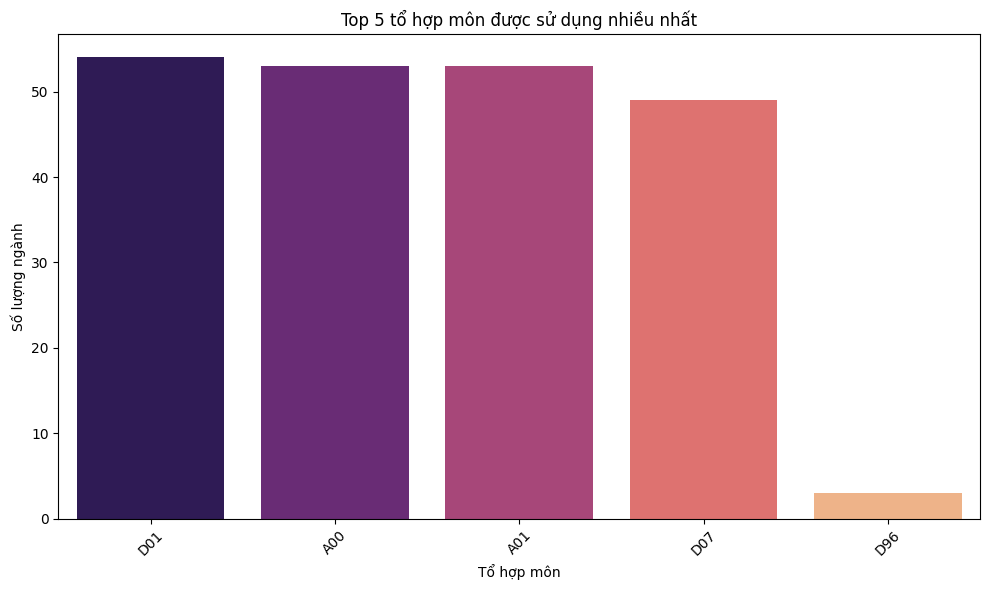

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(data=tohop_counts.head(5), x='Ma_xet', y='So_luong', palette='magma')
plt.title("Top 5 tổ hợp môn được sử dụng nhiều nhất")
plt.xlabel("Tổ hợp môn")
plt.ylabel("Số lượng ngành")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Axes: xlabel='Ma_xet', ylabel='So_luong'>

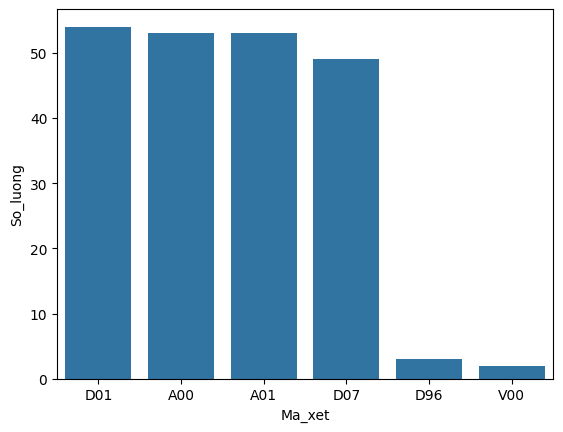

In [27]:
sns.barplot(data=tohop_counts, x='Ma_xet', y='So_luong')